# Observation from third network
- achevied validation score of 99.24% VS 99.23% of second network
-  There seems to be tendency of flucation of accuracy, meaning proper learning rate deduction might be usefull.


# Refining third network
 - Introduced learning rate scheduler
 - increased dropout to 1% and thereby increase number of epoch
 - batch size same as third network i.e. 64
 
# Achived 99.4% validation score in this notebook

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras  # intalled keras
import keras           # import keras

In [0]:
import numpy as np     # import numpy for numerical calculation

from keras.models import Sequential                                                     # import keras` Sequential model which is a linear stack of layers.
from keras.layers import Dense, Dropout, Activation, Flatten, Add,BatchNormalization     # importing : Dense - for fullconnected layers , Dropout : for dropout , Activation: activation function, 
                                                                      # Flatten : for converting n-dimensional array to 1-D array , Add : for adding layers
from keras.layers import Convolution2D, MaxPooling2D                  # importing convolution and maxpooling function
from keras.utils import np_utils                                      # from keras.utils import np_utils which is a separate package (and a keras dependency - which doesn't get install with it)

from keras.datasets import mnist                                      # from keras.datasets, importing mnist dataset

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()      # Load mnist and make  tuple pair of train and test

(60000, 28, 28)


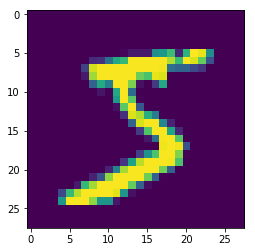

In [244]:
print (X_train.shape)                                                 # printing dimension of X_train. Total 60k of 2-Dimension 28x28 image
from matplotlib import pyplot as plt                                  # import pyplot as plt from matplotlib, used for plotting
%matplotlib inline                                                    # matplotlib magic command to show static plot right below our code
plt.imshow(X_train[0])                                                 # display first image in our training data

### Reshaping image because The Convolution2D layers in Keras are designed to work with 3 dimensions per example

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)          # reshaping 28x28x1 dimensions for all 60k images
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)              # reshaping 28x28x1 dimensions for all 10k images

### Change numpy array data types and Scaled
Currently it has "uint8" i.e. Unsigned integer (0 to 255).

Scaled ? Since we used Gradient Descent, for faster convergence we required number to be scaled.

In [0]:
X_train = X_train.astype('float32')        # changed array’s data-type to float32
X_test = X_test.astype('float32')          # same as above

# scale the pixel intensities down to the 0-1 range by dividing them by 255 which is the max value
X_train /= 255
X_test /= 255

### One-hot vector labels of target variable

In [247]:
y_train[:10]   # checking first 10 digits label (target variable)

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [249]:
Y_train[:10]     # the first 10 class` array, compare the position of 1 (count starts from 0) in below and our y_train[:10] values. These two are same!!


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

# Import google colab drive and user authentication¶


In [250]:
from google.colab import drive
drive.mount('/content/gdrive')

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials 


# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Defining model

In [251]:
from keras.layers import Activation # importing "Activation"
model = Sequential()                # initiate keras` Sequential model 

 
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(15, 3, 3, activation='relu')) # 24
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(20, 3, 3, activation='relu')) # 22
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2))) # 11
model.add(Convolution2D(10, 1, 1, activation='relu')) # 11
model.add(BatchNormalization())

model.add(Convolution2D(15, 3, 3, activation='relu')) # 9
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(20, 3, 3, activation='relu')) # 7
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, activation='relu')) #7
model.add(BatchNormalization())
model.add(Convolution2D(10, 7))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(15, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(15, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2

In [252]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_129 (Conv2D)          (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_113 (Bat (None, 26, 26, 10)        40        
_________________________________________________________________
dropout_81 (Dropout)         (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_130 (Conv2D)          (None, 24, 24, 15)        1365      
_________________________________________________________________
batch_normalization_114 (Bat (None, 24, 24, 15)        60        
_________________________________________________________________
dropout_82 (Dropout)         (None, 24, 24, 15)        0         
_________________________________________________________________
conv2d_131 (Conv2D)          (None, 22, 22, 20)        2720      
__________

### Learning rate Scheduler 
- This will allow our learning rate for optimizer Adam change per our defined function
- our function "scheduler" below change learning reduce after every 5 epoch

### Configures the model for training
- loss as 'categorical_crossentropy' since we are dealing with multi-class classification
- "adam" - Adaptive Moment Estimation one of the common/best gradient-based optimizer , with learning rate scheduler
- "accuracy" as the model metrics

In [0]:
# configure model with above parameters

from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
  return round(0.02 * 1/(1 + 0.319 * epoch), 5)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

# Callbacks for model monitor during training and saving weights¶


In [0]:
from keras.callbacks import  ModelCheckpoint  # importing checkpoint

filepath="/content/gdrive/My Drive/EVA_session_4-4_weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"                                  # filepath in google drive to save weights
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max',save_weights_only=True)    # checkpoint to monitor validation accuracy, and save which give max accuracy

### Fit the model on Training set
- batch_size=64 : sends 64 image in batch-wise and train model (feed-forward and backpropagation) 10 number of epoch : One epoch is when an entire dataset is passed both forward and backward through the neural network only once. verbose as 1 : show progress bar of the training with details

- 30 epoch

In [255]:
# fit model with above notes along with checkpoint and  validation datasets

model.fit(X_train, Y_train, batch_size=64, nb_epoch=30, verbose=1,
         validation_data=(X_test, Y_test),
         callbacks=[checkpoint])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 20s 335us/step - loss: 0.2310 - acc: 0.9275 - val_loss: 0.0486 - val_acc: 0.9852

Epoch 00001: val_acc improved from -inf to 0.98520, saving model to /content/gdrive/My Drive/EVA_session_4-4_weights-improvement-01-0.99.hdf5
Epoch 2/30
60000/60000 [==============================] - 13s 214us/step - loss: 0.0633 - acc: 0.9812 - val_loss: 0.0481 - val_acc: 0.9845

Epoch 00002: val_acc did not improve from 0.98520
Epoch 3/30
60000/60000 [==============================] - 13s 214us/step - loss: 0.0496 - acc: 0.9839 - val_loss: 0.0288 - val_acc: 0.9904

Epoch 00003: val_acc improved from 0.98520 to 0.99040, saving model to /content/gdrive/My Drive/EVA_session_4-4_weights-improvement-03-0.99.hdf5
Epoch 4/30
60000/60000 [==============================] - 14s 233us/step - loss: 0.0421 - acc: 0.9867 - val_loss: 0.0327 - val_acc: 0.9886

Epoch 00004: val_acc did not improve from 0.99040
Epo

### Model evaluation¶
Please note that predict is a part of model evaluation. Only after we predict, one can used prediction value to evalute our metrics, say "accuracy

In [0]:
model.load_weights('/content/gdrive/My Drive/EVA_session_4-4_weights-improvement-14-0.99.hdf5')  # load weight which give max accuracy in above training

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0) # Use trained model and predict on test set , then finally score metrics. We have given "accuracy" as our metrics

In [258]:
print(score)  # print validation score

[0.02099271324053043, 0.994]


In [0]:
y_pred = model.predict(X_test)  # used trained model to predict class

In [260]:
print(y_pred[:9])    # first 9 prediction
print(y_test[:9])     # actual 9 target class

[[5.20881838e-10 2.21902045e-11 2.82327695e-09 3.17371018e-08
  4.96450957e-14 8.31912456e-11 1.01584450e-15 1.00000000e+00
  1.86196192e-13 4.12667731e-08]
 [4.81559947e-09 1.16330803e-08 1.00000000e+00 1.16215084e-11
  3.17406062e-12 7.48262553e-17 9.67991465e-09 1.25061298e-13
  2.54121932e-11 2.66019368e-12]
 [2.28795538e-09 9.99990225e-01 6.80119342e-07 1.66889969e-08
  4.86634008e-07 1.69867278e-07 1.83407053e-07 7.90510785e-06
  8.82661908e-08 3.00229118e-07]
 [9.99675632e-01 2.86237679e-12 1.94403810e-07 1.25934090e-08
  2.19278928e-09 1.03605313e-09 3.22578882e-04 1.64922287e-09
  1.52059295e-06 3.22601146e-09]
 [4.94447487e-14 3.50008945e-11 1.63799974e-09 6.51800376e-16
  9.99999762e-01 3.43575944e-14 1.69674413e-11 7.57977778e-11
  2.71611900e-12 2.72087021e-07]
 [5.04257747e-09 9.99984860e-01 4.42564169e-06 1.67326930e-09
  8.63631271e-07 5.50307910e-10 9.79125492e-09 9.08605034e-06
  9.35809865e-08 6.66935534e-07]
 [3.32428096e-15 2.89113888e-08 1.57923917e-11 6.43909906e

# Visualization


In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

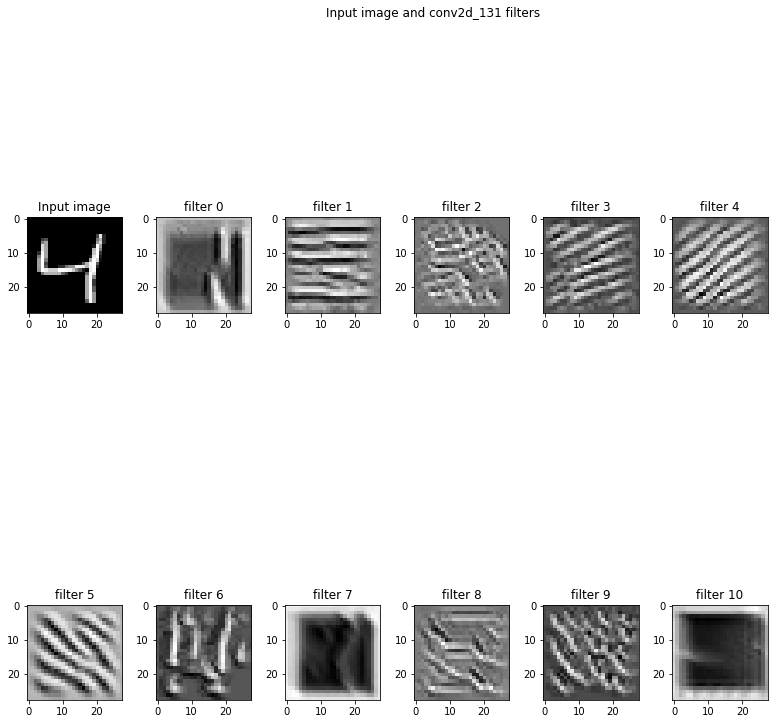

In [262]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_131'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()